## MAT 653 
#### Wei Li

### Stochastic Local Search

Example 5.6, 5.7 

A simulated sample of 400 observations from this mixture with $\mu_1 = 0$ and $\mu_2 = 2.5$
be careful, some parts of the code in the book are incorrect.

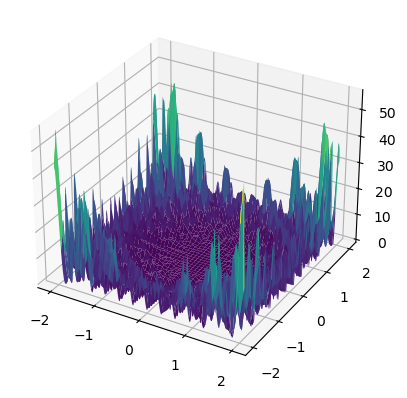

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import meshgrid
from math import sin, cos, cosh

# Define the function h(x, y)
def h(x, y):
    return (x * sin(20 * y) + y * sin(20 * x)) ** 2 * cosh(sin(10 * x) * x) + \
           (x * cos(10 * y) - y * sin(10 * x)) ** 2 * cosh(cos(20 * y) * y)

# Create grid
x = y = np.linspace(-2, 2, 435)
x_grid, y_grid = meshgrid(x, y)
z = np.vectorize(h)(x_grid, y_grid)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, z, cmap='viridis')
plt.show()


In [ ]:

# Stochastic Gradient (SG) function (stochastic local search)
def SG(x, alpha, beta):
    theta = np.array([x])
    diff = iter = 1
    hval = h(x[0], x[1])
    
    while diff > 1e-4:
        zeta = np.random.randn(2)
        zeta /= np.linalg.norm(zeta)
        h_plus = theta[-1, :] + beta(iter) * zeta
        h_minus = theta[-1, :] - beta(iter) * zeta
        grad = alpha(iter) * zeta * (h(h_plus[0], h_plus[1]) - h(h_minus[0], h_minus[1])) / (2 * beta(iter))
        
        scale = np.linalg.norm(grad)
        while scale > 1:
            zeta = np.random.randn(2)
            zeta /= np.linalg.norm(zeta)
            h_plus = theta[-1, :] + beta(iter) * zeta
            h_minus = theta[-1, :] - beta(iter) * zeta
            grad = alpha(iter) * zeta * (h(h_plus[0], h_plus[1]) - h(h_minus[0], h_minus[1])) / (2 * beta(iter))
            scale = np.linalg.norm(grad)
            print(f"At iteration {iter}, zeta needs to be regenerated...")
        
        theta = np.vstack([theta, theta[-1, :] - grad])
        hval = np.append(hval, h(theta[-1, 0], theta[-1, 1]))
        diff = scale
        if iter == 500:
            diff = 0
        print(f"At iteration {iter}")
        iter += 1
    
    return {'theta': theta, 'hval': hval, 'ite': iter}



At iteration 1
At iteration 2, zeta needs to be regenerated...
At iteration 2
At iteration 3, zeta needs to be regenerated...
At iteration 3
At iteration 4
At iteration 5
At iteration 6
At iteration 7
At iteration 8
At iteration 9
At iteration 10
At iteration 11
At iteration 12
At iteration 13
At iteration 14
At iteration 15
At iteration 16
At iteration 17
At iteration 18
At iteration 19
At iteration 20
At iteration 21
At iteration 22
At iteration 23
At iteration 24
At iteration 25
At iteration 26
At iteration 27
At iteration 28
At iteration 29
At iteration 30
At iteration 31
At iteration 32
At iteration 33
At iteration 34
At iteration 35
At iteration 36
At iteration 37
At iteration 38
At iteration 39
At iteration 40
At iteration 41
At iteration 42
At iteration 43
At iteration 44
At iteration 45
At iteration 46
At iteration 47
At iteration 48
At iteration 49
At iteration 50
At iteration 51
At iteration 52
At iteration 53
At iteration 54
At iteration 55
At iteration 56
At iteration 57
I

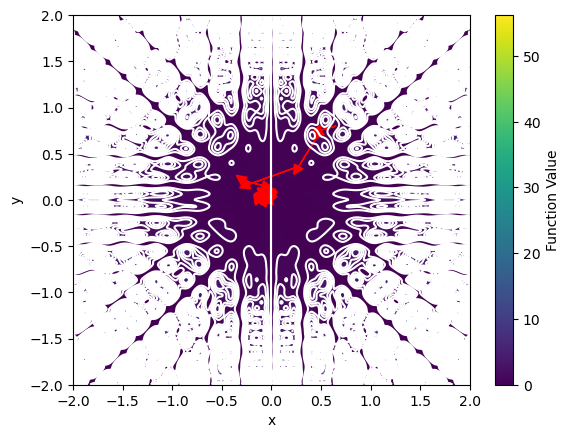

In [4]:
# Alpha and Beta functions
alpha = lambda x: 1 / (x + 1)
beta = lambda x: 1 / ((x + 1) ** 0.1)

# Starting point
start = np.array([0.65, 0.8])
outcome = SG(start, alpha, beta)
print("Iterations:", outcome['ite'])
sols = outcome['theta']
print("Last 10 solutions:")
print(sols[-10:, :])

# Heatmap
plt.imshow(z, extent=[-2, 2, -2, 2], origin='lower',
           cmap='viridis', aspect='auto')
plt.colorbar(label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.contour(x, y, z, levels=100, colors='white')

# Plot the iterations
for j in range(outcome['ite'] - 1):
    plt.arrow(sols[j, 0], sols[j, 1], sols[j + 1, 0] - sols[j, 0], sols[j + 1, 1] - sols[j, 1],
              head_width=0.1, head_length=0.1, fc='red', ec='red')

plt.show()
